<a href="https://colab.research.google.com/github/jittipak0/CTSCJ-Tokenization/blob/main/CTSCJ_Tokenization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import



In [39]:
!pip install gdown -q
!pip install pythainlp -q
!pip install attacut -q
#!pip install nltk -q
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf -q
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')
import gdown
#import nlk
#nltk.dowtnload('punkt')
from pythainlp.tokenize import word_tokenize
from nltk.util import ngrams
from pythainlp.util import normalize
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import Tokenizer
from pythainlp.corpus.common import thai_words
from pythainlp.util import dict_trie
from collections import Counter
import re
from tqdm import tqdm
from sklearn.model_selection import train_test_split
#import math
import matplotlib.pyplot as plt

#เตรียมข้อมูล

## ข้อมูลดิบ

In [40]:
# ข้อมูลดิบ
url = 'https://drive.google.com/uc?id=12Aqsi6nVSMx5_jUuUdmjY9KtjW9EXrez'
output = 'thai-judicial-decisions-raw-data-unformat.txt'
gdown.download(url, output, quiet=True)
with open('thai-judicial-decisions-raw-data-unformat.txt', 'r') as file:
    data = file.readlines()
data = [line.strip() for line in data]
for numRow in range(len(data)):
  data[numRow] = data[numRow].split(' ')

st = 0
en = 0
doc = []
for i in range(len(data)):
  if data[i] == ['']:
    en=i
    nested_list = data[st:en]
    flattened_list = [item for sublist in nested_list for item in sublist]
    doc.append(word_tokenize(normalize(" ".join(flattened_list)), engine="newmm",keep_whitespace=False,join_broken_num=True))
    st = i+1

st = 0
en = 0
doc_uncut = []
for i in range(len(data)):
  if data[i] == ['']:
    en=i
    nested_list = data[st:en]
    flattened_list = [item for sublist in nested_list for item in sublist]
    doc_uncut.append(' '.join(flattened_list))
    st = i+1

## ข้อมูลเฉลย

In [41]:
def convert(text):
  # ลบคำที่เป็นช่องว่าง
  words = re.sub("(.*) : ", "", text)
  # ใช้เครื่องหมาย | เป็นตัวแยกคำ
  words = re.split(r'\|', words)
  return words

In [42]:
url = 'https://drive.google.com/uc?id=1gTYeSADoVlNPUXZmFiiNxcUgk_eFKrvI'
output = 'pipTextCustomNew.txt'
gdown.download(url, output, quiet=True)

with open('pipTextCustomNew.txt', 'r') as file:
    pipTextCustomNew = file.readlines()
pipTextCustomNew = [line.strip() for line in pipTextCustomNew]

pipDocCustomNew = []
for i in pipTextCustomNew:
  if i != '':
    pipDocCustomNew.append(convert(i))

newWord=[]
for index1,item1 in enumerate(pipDocCustomNew):
  for index2,item2 in enumerate(item1):
    if item2 not in doc[index1] and item2 not in newWord:
      newWord.append(item2)

url = 'https://drive.google.com/uc?id=1pZCUur3E-G13TPrg7PxDugUAjkg72ynf'
output = 'CustomNew.txt'
gdown.download(url, output, quiet=True)

with open('CustomNew.txt', 'r') as file:
    CustomNew = file.readlines()
CustomNew = [line.strip() for line in CustomNew]

for i in CustomNew:
  newWord.append(i.split(':')[0])

custom_words_list = set(thai_words())
for i in newWord:
  custom_words_list.add(i)
trie = dict_trie(dict_source=custom_words_list)

st = 0
en = 0
expectedDoc = []
for i in range(len(data)):
  if data[i] == ['']:
    en=i
    nested_list = data[st:en]
    flattened_list = [item for sublist in nested_list for item in sublist]
    expectedDoc.append(word_tokenize(normalize(" ".join(flattened_list)), engine="newmm",keep_whitespace=False,join_broken_num=True, custom_dict=trie))
    st = i+1



```
url = 'https://drive.google.com/uc?id=1X4h5Ttv0Hqg8b2-OWcw-kwpJXZPXFrTU'
output = 'thai-judicial-decisions-gold-standard.txt'
gdown.download(url, output, quiet=True)

with open('thai-judicial-decisions-gold-standard.txt', 'r') as file:
    gold_standard = file.readlines()
gold_standard = [line.strip() for line in gold_standard]

pipDocCustomNew = []
for row in gold_standard:
  pipDocCustomNew.append(re.split(r'\|', row))

newWord=[]
for index1,item1 in enumerate(pipDocCustomNew):
  for index2,item2 in enumerate(item1):
    if item2 not in doc[index1] and item2 not in newWord:
      newWord.append(item2)

custom_words_list = set(thai_words())
custom_words_list.update(newWord)
trie = dict_trie(dict_source=custom_words_list)

st = 0
en = 0
expectedDoc = []
for i in range(len(data)):
  if data[i] == ['']:
    en=i
    nested_list = data[st:en]
    flattened_list = [item for sublist in nested_list for item in sublist]
    expectedDoc.append(word_tokenize(normalize(" ".join(flattened_list)), engine="newmm",keep_whitespace=False,join_broken_num=True, custom_dict=trie))
    st = i+1
```



## เเบ่ง Train Test

In [43]:
train,test = train_test_split(range(len(expectedDoc)), test_size=0.3, random_state=42)

doc_train = []
for i in train:
  doc_train.append(doc[i])

doc_test = []
for i in test:
  doc_test.append(doc[i])

expectedDoc_train = []
for i in train:
  expectedDoc_train.append(expectedDoc[i])

expectedDoc_test = []
for i in test:
  expectedDoc_test.append(expectedDoc[i])

##คลีนข้อมูล



In [44]:
url = 'https://drive.google.com/uc?id=1ob5p4XX0PBmdJjRNTRSYH2i2iZKqYHM9'
output = 'removeNgarm.txt'
gdown.download(url, output, quiet=True)

with open('removeNgarm.txt', 'r') as file:
    removeNgarm = file.readlines()
removeNgarm = [line.strip() for line in removeNgarm]

# เพิ่มคำใน remove ลงใน stopwords
stopwords = set(thai_stopwords())
stopwords.update(removeNgarm)

url = 'https://drive.google.com/uc?id=1-bk24SOg7djTA6rSY5l2Gf8MaRcjhIDK'
output = 'unique_removed.txt'
gdown.download(url, output, quiet=True)
with open('unique_removed.txt', 'r') as file:
    unique_words = file.readlines()
unique_words = [line.strip() for line in unique_words]

cleaned_doc = []
for document in doc_train:
  cleaned_doc.append([word for word in document if word.strip() and word in unique_words])

join_doc = []
for document in cleaned_doc:
  join_doc = join_doc + document

vocab = set(join_doc)

##สร้าง List BiGram และ TriGram

In [45]:
addTag = []
for i in filtered_list:
  addTag.append(['<s>']+i+['<s/>'])

join_new_list= []
for document in addTag:
  join_new_list = join_new_list + document

Bi_Gram_list = []
Tri_Gram_list = []
for i in addTag:
  Bi_Gram_list = Bi_Gram_list + list(ngrams(i, 2))
  Tri_Gram_list = Tri_Gram_list + list(ngrams(i, 3))

# นับความถี่ของ N-grams
vocabulary = dict(Counter(join_new_list))
Bi_gram_freq = Counter(Bi_Gram_list)
Tri_gram_freq = Counter(Tri_Gram_list)

# Bigram

In [46]:
# สร้าง Bigram probability
bigram_probabilities = {}

for bigram, freq in Bi_gram_freq.items():
  w1 = bigram[0]
  w2 = bigram[1]
  w1_freq = vocabulary[w1]
  w2_freq = vocabulary[w2]
  prob_w1 = freq / w1_freq
  prob_w2 = freq / w2_freq
  probability = (prob_w1+prob_w2)
  if w1 in vocab and w1 not in stopwords and w2 not in stopwords and probability != 2:
    bigram_probabilities[bigram] = probability

# เรียง vocabulary จากมากไปน้อยโดยใช้ความถี่
sort_bigram=dict(sorted(bigram_probabilities.items(), key=lambda item: item[1], reverse=True))

# Trigram

In [47]:
# สร้าง Trigram probability
trigram_probabilities = {}

for trigram, freq in Tri_gram_freq.items():
  w1 = trigram[0]
  w2 = trigram[1]
  w3 = trigram[2]
  bigram = Bi_gram_freq[(w1, w2)]
  prob_w1 = freq / bigram
  prob_w2 = freq / vocabulary[w3]
  probability = (prob_w1+prob_w2)
  if w1 not in stopwords and w2 not in stopwords and w3 not in stopwords and probability != 2:
    trigram_probabilities[trigram] = probability

# เรียง vocabulary จากมากไปน้อยโดยใช้ความถี่
sort_trigram=dict(sorted(trigram_probabilities.items(), key=lambda item: item[1], reverse=True))

# Train

In [48]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

# ฟังก์ชันคำนวณ Precision
def precision(gt, pred):
    true_positives = len(intersection(gt,pred))
    return true_positives / len(pred)

# ฟังก์ชันคำนวณ Recall
def recall(gt, pred):
    true_positives = len(intersection(gt,pred))
    return true_positives / len(gt)

# ฟังก์ชันคำนวณ F1 Score
def f1_score(gt, pred):
    precision_score = precision(gt, pred)
    recall_score = recall(gt, pred)
    if precision_score + recall_score == 0:
        return 0
    return 2 * (precision_score * recall_score) / (precision_score + recall_score)

# Python program to get average of a list
def Average(lst):
    return sum(lst) / len(lst)

## Train BiGram

100%|██████████| 100/100 [27:37<00:00, 16.58s/it]


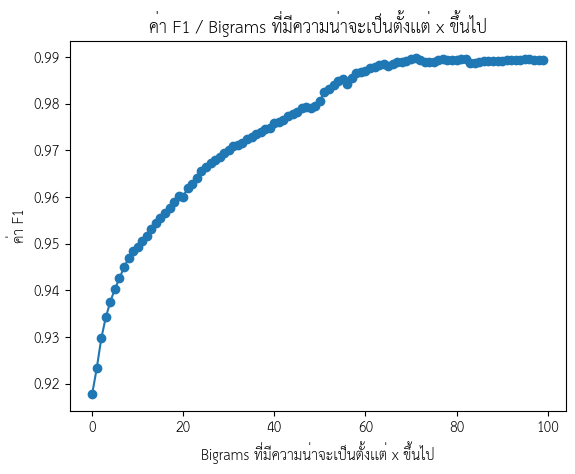

ค่า x ที่ได้คะเเนน F1 สูงสุด :71
คะเเนน F1 สูงสุด :0.989801734
จำนวนคำที่เพิ่ม :277 คำ


In [49]:
AverageBigrams = []
joined_bigrams = {''.join(bigram): probability / 2 for bigram, probability in sort_bigram.items()}

for num in tqdm (range(0,100)):
  min_probability = (num/100)
  selected_bigrams = [bigram for bigram, probability in joined_bigrams.items() if probability >= min_probability]
  custom_words_list_Bigrams = set(thai_words())
  custom_words_list_Bigrams.update(selected_bigrams)
  trie_Bigrams = dict_trie(dict_source=custom_words_list_Bigrams)

  newTokenizer = []
  for i in train:
    doc_uncut[i]
    newTokenizer.append(word_tokenize(normalize(doc_uncut[i]), engine="newmm",keep_whitespace=False,join_broken_num=True, custom_dict=trie_Bigrams))


  list_F1 = []
  for i in range(len(train)):
    ground_truth = expectedDoc_train[i]
    prediction = newTokenizer[i]
    list_F1.append(f1_score(ground_truth, prediction))

  average = Average(list_F1)
  AverageBigrams.append(round(average, 10))

# สร้างกราฟ
plt.plot(AverageBigrams, marker='o', linestyle='-')
plt.xlabel('Bigrams ที่มีความน่าจะเป็นตั้งเเต่ x ขึ้นไป')
plt.ylabel('ค่า F1')
plt.title('ค่า F1 / Bigrams ที่มีความน่าจะเป็นตั้งเเต่ x ขึ้นไป')
plt.show()

print(f'ค่า x ที่ได้คะเเนน F1 สูงสุด :{AverageBigrams.index(max(AverageBigrams))}')
print(f'คะเเนน F1 สูงสุด :{max(AverageBigrams)}')
print(f'จำนวนคำที่เพิ่ม :{len([bigram for bigram, probability in sort_bigram.items() if probability >= (((AverageBigrams.index(max(AverageBigrams)))/100)*2)]) } คำ')


## Train Trigram

100%|██████████| 100/100 [28:13<00:00, 16.94s/it]


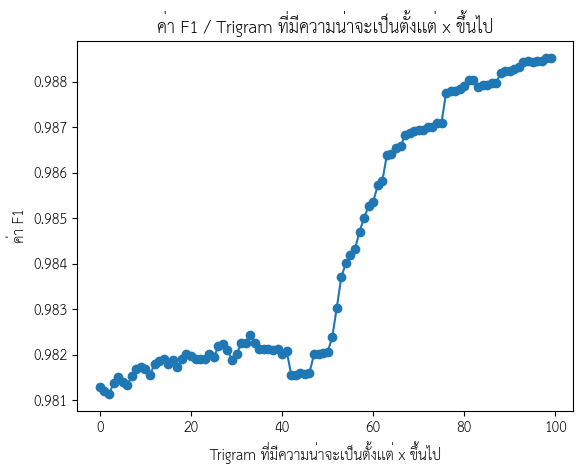

ค่า x ที่ได้คะเเนน F1 สูงสุด :98
คะเเนน F1 สูงสุด :0.9885228411
จำนวนคำที่เพิ่ม :1 คำ


In [50]:
AverageTrigram = []
joined_trigrams = {''.join(trigram): probability / 2 for trigram, probability in sort_trigram.items()}

for num in tqdm (range(0,100)):
  min_probability = (num/100)
  selected_trigram = [trigram for trigram, probability in joined_trigrams.items() if probability >= min_probability]
  custom_words_list_trigrams = set(thai_words())
  custom_words_list_trigrams.update(selected_trigram)
  trie_trigrams = dict_trie(dict_source=custom_words_list_trigrams)

  newTokenizer = []
  for i in train:
    doc_uncut[i]
    newTokenizer.append(word_tokenize(normalize(doc_uncut[i]), engine="newmm",keep_whitespace=False,join_broken_num=True, custom_dict=trie_trigrams))


  list_F1 = []
  for i in range(len(train)):
    ground_truth = expectedDoc_train[i]
    prediction = newTokenizer[i]
    list_F1.append(f1_score(ground_truth, prediction))

  average = Average(list_F1)
  AverageTrigram.append(round(average, 10))

# สร้างกราฟ
plt.plot(AverageTrigram, marker='o', linestyle='-')
plt.xlabel('Trigram ที่มีความน่าจะเป็นตั้งเเต่ x ขึ้นไป')
plt.ylabel('ค่า F1')
plt.title('ค่า F1 / Trigram ที่มีความน่าจะเป็นตั้งเเต่ x ขึ้นไป')
plt.show()

print(f'ค่า x ที่ได้คะเเนน F1 สูงสุด :{AverageTrigram.index(max(AverageTrigram))}')
print(f'คะเเนน F1 สูงสุด :{max(AverageTrigram)}')
print(f'จำนวนคำที่เพิ่ม :{len([trigram for trigram, probability in sort_trigram.items() if probability >= (((AverageTrigram.index(max(AverageTrigram)))/100)*2)]) } คำ')


#Test

##2gram

In [51]:
st = 0
en = 0
newTokenizer = []
for i in range(len(data)):
  if data[i] == ['']:
    en=i
    nested_list = data[st:en]
    flattened_list = [item for sublist in nested_list for item in sublist]
    newTokenizer.append(word_tokenize(normalize(" ".join(flattened_list)), engine="newmm",keep_whitespace=False,join_broken_num=True, custom_dict=trie_Bigrams))
    st = i+1
newTokenizer_test = []
for i in test:
  newTokenizer_test.append(newTokenizer[i])
list_F1 = []
for i in range(len(newTokenizer_test)):
  ground_truth = expectedDoc_test[i]
  prediction = newTokenizer_test[i]
  # คำนวณค่า F1 Score
  list_F1.append(f1_score(ground_truth, prediction))

F1_Bigrams = (round(Average(list_F1), 10))

print(f'คะเเนน F1:{F1_Bigrams}')

คะเเนน F1:0.9891467669


##3gram

In [52]:
st = 0
en = 0
newTokenizer = []
for i in range(len(data)):
  if data[i] == ['']:
    en=i
    nested_list = data[st:en]
    flattened_list = [item for sublist in nested_list for item in sublist]
    newTokenizer.append(word_tokenize(normalize(" ".join(flattened_list)), engine="newmm",keep_whitespace=False,join_broken_num=True, custom_dict=trie_trigrams))
    st = i+1
newTokenizer_test = []
for i in test:
  newTokenizer_test.append(newTokenizer[i])
list_F1 = []
for i in range(len(newTokenizer_test)):
  ground_truth = expectedDoc_test[i]
  prediction = newTokenizer_test[i]
  # คำนวณค่า F1 Score
  list_F1.append(f1_score(ground_truth, prediction))

F1_Trigram = (round(Average(list_F1), 10))

print(f'คะเเนน F1:{F1_Trigram}')

คะเเนน F1:0.9875201862


##2+3gram

In [55]:
custom_words_list_Ngram = set(thai_words())
for i in joined_bigrams:
  custom_words_list_Ngram.add(i)
for i in joined_trigrams:
  custom_words_list_Ngram.add(i)

trie_Ngram = dict_trie(dict_source=custom_words_list_Ngram)

st = 0
en = 0
newTokenizer = []
for i in range(len(data)):
  if data[i] == ['']:
    en=i
    nested_list = data[st:en]
    flattened_list = [item for sublist in nested_list for item in sublist]
    newTokenizer.append(word_tokenize(normalize(" ".join(flattened_list)), engine="newmm",keep_whitespace=False,join_broken_num=True, custom_dict=trie_Ngram))
    st = i+1
newTokenizer_test = []
for i in test:
  newTokenizer_test.append(newTokenizer[i])
list_F1 = []
for i in range(len(newTokenizer_test)):
  ground_truth = expectedDoc_test[i]
  prediction = newTokenizer_test[i]
  # คำนวณค่า F1 Score
  list_F1.append(f1_score(ground_truth, prediction))

F1_Ngram = (round(Average(list_F1), 10))

print(f'คะเเนน F1:{F1_Ngram}')

คะเเนน F1:0.9467804813


##newmm

In [53]:
list_F1 = []
for i in range(len(test)):
  ground_truth = expectedDoc_test[i]
  prediction = doc_test[i]
  # คำนวณค่า F1 Score
  list_F1.append(f1_score(ground_truth, prediction))

F1_Trigram = (round(Average(list_F1), 10))

print(f'คะเเนน F1:{F1_Trigram}')

คะเเนน F1:0.9875201862


##attacut

In [54]:
st = 0
en = 0
attacut = []
for i in range(len(data)):
  if data[i] == ['']:
    en=i
    nested_list = data[st:en]
    flattened_list = [item for sublist in nested_list for item in sublist]
    attacut.append(word_tokenize(normalize(" ".join(flattened_list)), engine="attacut",keep_whitespace=False,join_broken_num=True))
    st = i+1

attacut_test = []
for i in test:
  attacut_test.append(attacut[i])

list_F1 = []
for i in range(len(test)):
  ground_truth = expectedDoc_test[i]
  prediction = attacut_test[i]
  # คำนวณค่า F1 Score
  list_F1.append(f1_score(ground_truth, prediction))

F1_Trigram = (round(Average(list_F1), 10))

print(f'คะเเนน F1:{F1_Trigram}')

คะเเนน F1:0.6941382949
